In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualization

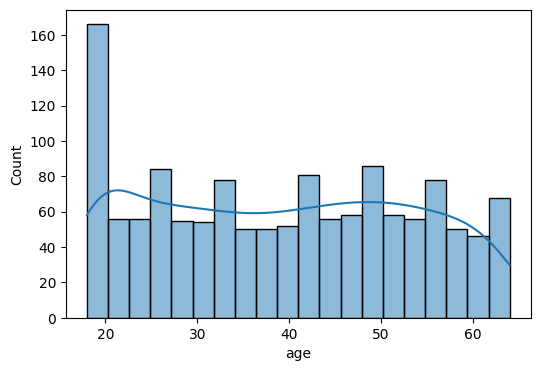

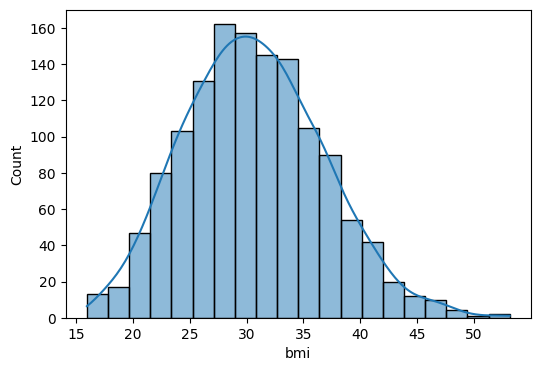

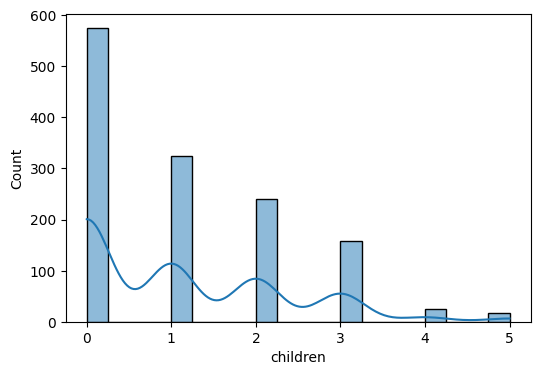

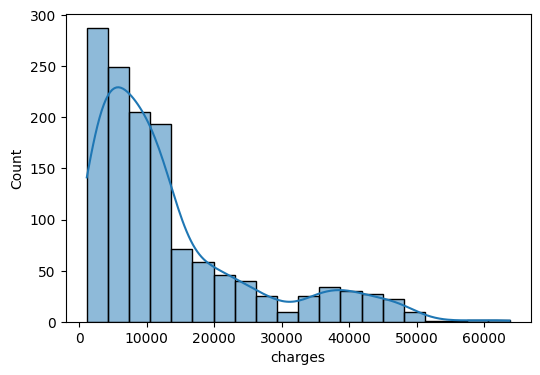

In [8]:
numeric_columns = df[["age", "bmi", "children", "charges"]]
for i in numeric_columns:
    plt.figure(figsize= (6,4))
    sns.histplot(df[i],kde = True, bins = 20)

<Axes: xlabel='children', ylabel='count'>

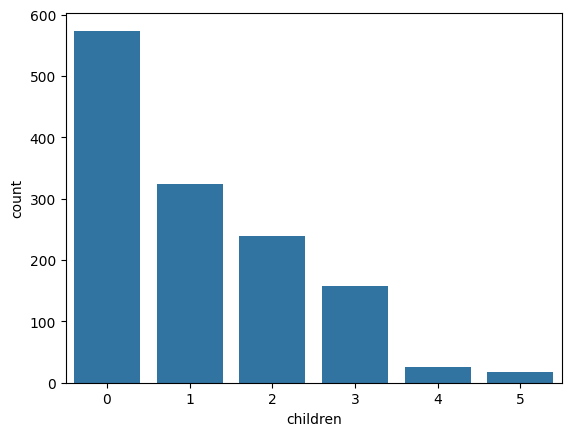

In [9]:
sns.countplot(x = df["children"])

<Axes: xlabel='sex', ylabel='count'>

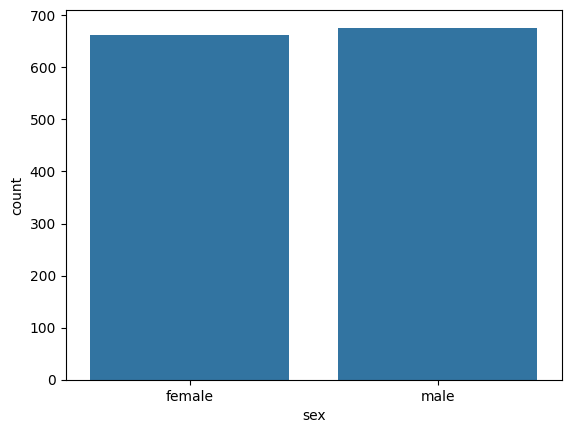

In [10]:
sns.countplot(x = df["sex"])

<Axes: xlabel='smoker', ylabel='count'>

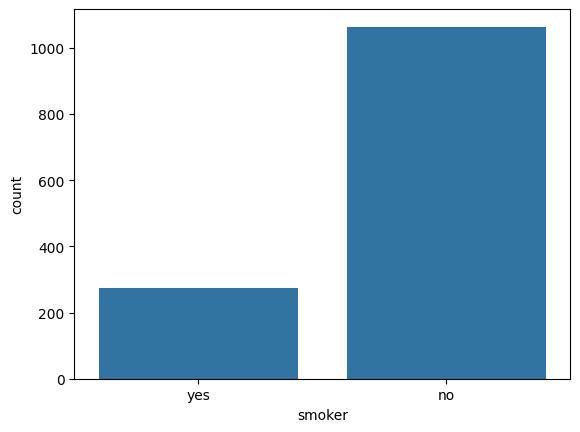

In [11]:
sns.countplot(x = df["smoker"])

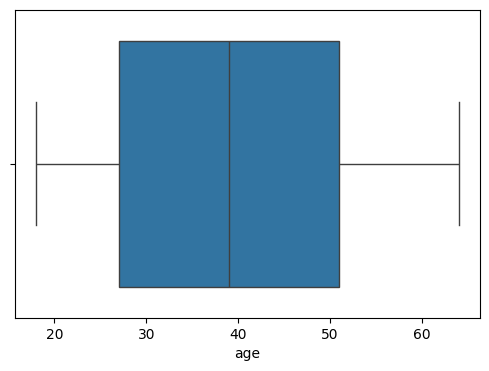

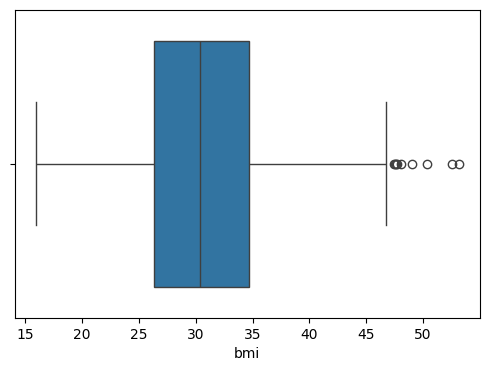

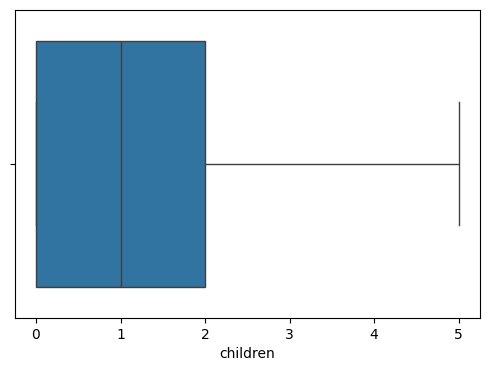

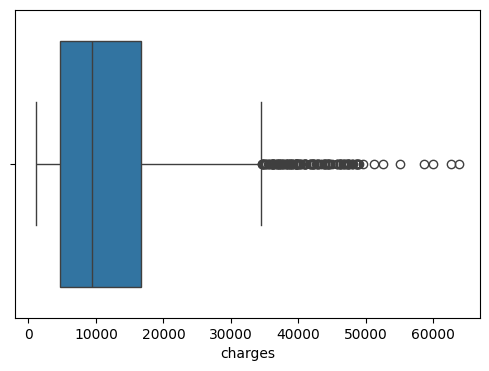

In [12]:
for i in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i])

<Axes: >

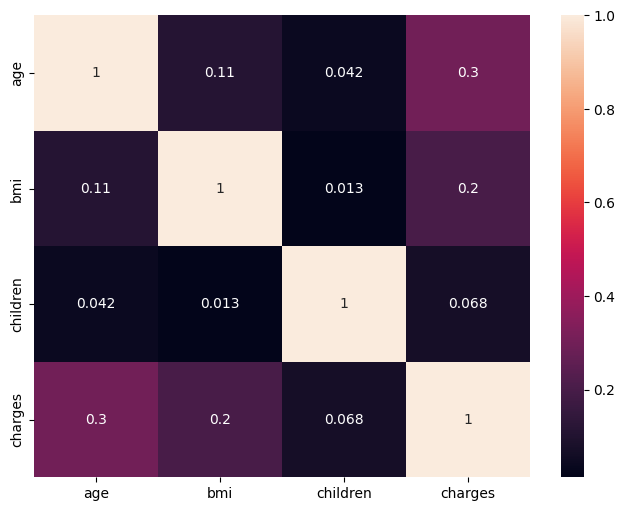

In [13]:
plt.figure(figsize= (8,6))
sns.heatmap(df.corr(numeric_only = True),annot = True)

# Data Cleaning and Perprocessing

In [14]:
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df_cleaned.shape

(1338, 7)

In [16]:
df_cleaned.drop_duplicates(inplace= True)

In [17]:
df_cleaned.shape

(1337, 7)

In [18]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [21]:
df_cleaned["sex"] = df_cleaned["sex"].map({"male" : 0, "female" : 1})

In [22]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [23]:
df_cleaned["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [24]:
df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes":1, "no":0})

In [25]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [26]:
df_cleaned.rename(columns={
    "sex":"is_female",
    "smoker":"is_somker"
},inplace = True)

In [27]:
df_cleaned.head()

,age,is_female,bmi,children,is_somker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
df_cleaned["region"].value_counts()


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [29]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ["region"],drop_first = False)

In [30]:
df_cleaned.head()

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [31]:
df_cleaned = df_cleaned.astype(int)

In [32]:
df_cleaned.head()

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

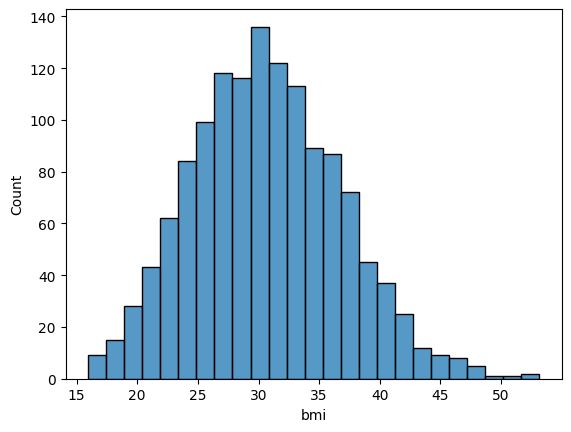

In [33]:
sns.histplot(df["bmi"])

In [34]:
df_cleaned["bmi_category"] = pd.cut(
    df_cleaned["bmi"],
    bins = [0, 18.5, 24.9, 29.9, float("inf")],
    labels = ["Underweight", "Normal", "Overweight", "Obese"]
)

In [35]:
df_cleaned

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obese
2,28,0,33,3,0,4449,0,0,1,0,Obese
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,Obese
1334,18,1,31,0,0,2205,1,0,0,0,Obese
1335,18,1,36,0,0,1629,0,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,0,1,Overweight


In [36]:
df_cleaned["Age_category"] = pd.cut(
    df_cleaned["age"],
    bins = [0, 18, 29, 45, float("inf")],
    labels = ["Child", "Teenagers", "Adult", "Elder"]
)

In [37]:
df_cleaned

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category,Age_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight,Teenagers
1,18,0,33,1,0,1725,0,0,1,0,Obese,Child
2,28,0,33,3,0,4449,0,0,1,0,Obese,Teenagers
3,33,0,22,0,0,21984,0,1,0,0,Normal,Adult
4,32,0,28,0,0,3866,0,1,0,0,Overweight,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,Obese,Elder
1334,18,1,31,0,0,2205,1,0,0,0,Obese,Child
1335,18,1,36,0,0,1629,0,0,1,0,Obese,Child
1336,21,1,25,0,0,2007,0,0,0,1,Overweight,Teenagers


In [38]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ["bmi_category"],drop_first = True)

In [39]:
df_cleaned = pd.get_dummies(df_cleaned, columns = ["Age_category"],drop_first = True)

In [40]:
df_cleaned = df_cleaned.astype(int)

In [41]:
df_cleaned

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,Age_category_Teenagers,Age_category_Adult,Age_category_Elder
0,19,1,27,0,1,16884,0,0,0,1,0,1,0,1,0,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,1,0,0,0
2,28,0,33,3,0,4449,0,0,1,0,0,0,1,1,0,0
3,33,0,22,0,0,21984,0,1,0,0,1,0,0,0,1,0
4,32,0,28,0,0,3866,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,0,0,1,0,0,1
1334,18,1,31,0,0,2205,1,0,0,0,0,0,1,0,0,0
1335,18,1,36,0,0,1629,0,0,1,0,0,0,1,0,0,0
1336,21,1,25,0,0,2007,0,0,0,1,0,1,0,1,0,0


# Preprocessing

In [42]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_somker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Normal', 'bmi_category_Overweight',
       'bmi_category_Obese', 'Age_category_Teenagers', 'Age_category_Adult',
       'Age_category_Elder'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler
cols = ["age", "bmi", "children"]
scaler = StandardScaler()  #object created from class

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [44]:
df_cleaned.head()

,age,is_female,bmi,children,is_somker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,Age_category_Teenagers,Age_category_Adult,Age_category_Elder
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,1,0,1,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,1,0,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,1,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,1,0,0,0,1,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,1,0,0,1,0


In [45]:
# though there is age also in negative but it's totally fine bcz we apply standard scalling

# Feature Extracting

In [46]:
from scipy.stats import pearsonr
# pearsonr corelation calculation

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_somker',
    'region_northwest', 'region_southeast', 'region_southwest','region_northeast',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
    'Age_category_Teenagers', 'Age_category_Adult',	'Age_category_Elder'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned["charges"])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()),  columns = ['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by = "Pearson Correlation", ascending = False)

,Feature,Pearson Correlation
4,is_somker,0.787234
0,age,0.298309
14,Age_category_Elder,0.250356
11,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
8,region_northeast,0.005946
13,Age_category_Adult,-0.035116
5,region_northwest,-0.038695


In [47]:
cat_features = [
    'is_female', 'is_somker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [48]:
from scipy.stats import chi2_contingency

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}


for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_somker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [49]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_somker', 'charges','region_southeast','bmi_category_Obese']]
final_df

,age,is_female,bmi,children,is_somker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X = final_df.drop("charges", axis = 1)
y = final_df["charges"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
